# Apple cultivars

* **Data:** `apples.csv`
* **Description:** Types of apples
* **Source:** https://en.wikipedia.org/wiki/List_of_apple_cultivars
* **Columns of interest:**
    * `Common name` - the non-scientific name of the apple cultivar
    * `Origin` - where it came from
    * `First developed` - year it was developed
    * `Comment` - Description
    * `Use` - whether best for eating, baking, etc

Note that you'll need to brush up on `.str.contains` for this notebook.

## Read in your data

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests

ModuleNotFoundError: No module named 'requests'

In [43]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)

In [44]:
pd.read_csv("apples.csv", encoding="utf-8")
df = pd.read_csv("apples.csv", encoding="utf-8")

# df = pd.read_csv("street-trees.csv", nrows = 2000000, encoding="utf-8")

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [45]:
df

,common_name,origin,first_developed,comment,use
0,Abram,US,1850,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,Introduced 1941,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,Introduced 1826,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating
...,...,...,...,...,...
1196,Zimska Kolačara,Serbia,1900,"A greenish yellow apple. W 55-65, H 65-75, We ...","Eating, Cooking, Pie"
1197,Zoar Greening,US,1865,"Flesh white, tender, juicy, subacid, good. Use...",Eating
1198,Ökna Lökäpple,Sweden,1830,"Greenish yellow with some red stripes. H 50, W...",Eating
1199,Ökna vita Vintergylling,Sweden,1900,"A small yellow conical apple. H 60, W 60. Use ...","Cooking, Eating."


In [46]:
df.shape

(1201, 5)

In [47]:
df.dtypes

common_name        object
origin             object
first_developed    object
comment            object
use                object
dtype: object

## Clean up the "First developed" column

Sometimes it's a year and sometimes it is an "introduced" year, like `Introduced 1826`. We just want all of them to be years, so feel free to remove the "Introduced" part.

In [48]:
df.first_developed = df.first_developed.str.replace("Introduced ", "", regex=False)

In [49]:
df

,common_name,origin,first_developed,comment,use
0,Abram,US,1850,"A small apple with red flush. Flesh white, ten...",Eating
1,Acheson,Canada,1941,"Fruit large, greenish yellow. P Delicious x un...",Eating
2,Acklam Russet,England,1768,A small russet apple. An excellent dessert app...,Eating
3,Adams Pearmain,England,1826,A dessert apple. First introduced under the na...,Eating
4,"Adina (syn. Frankad, Satark)",Australia,NaN,"A large red apple. Flesh firm, juicy, sweet, v...",Eating
...,...,...,...,...,...
1196,Zimska Kolačara,Serbia,1900,"A greenish yellow apple. W 55-65, H 65-75, We ...","Eating, Cooking, Pie"
1197,Zoar Greening,US,1865,"Flesh white, tender, juicy, subacid, good. Use...",Eating
1198,Ökna Lökäpple,Sweden,1830,"Greenish yellow with some red stripes. H 50, W...",Eating
1199,Ökna vita Vintergylling,Sweden,1900,"A small yellow conical apple. H 60, W 60. Use ...","Cooking, Eating."


## What percentage of apples are just for eating?

In [100]:
df.use.value_counts(normalize=True, dropna=False) * 100
# df.use.value_counts(normalize=True) * 100

Eating                                 52.70607826810991
Cooking                                11.99000832639467
Cooking, Eating                        8.659450457951708
NaN                                    8.409658617818485
Eating, Cooking                        5.412156536219817
                                             ...        
Cooking, Drying.                     0.08326394671107411
Eating, Cooking, Drying              0.08326394671107411
Cooking, (Eating)                    0.08326394671107411
Cooking (applesauce), Eating, Pies   0.08326394671107411
Eating, cider, juice                 0.08326394671107411
Name: use, Length: 73, dtype: float64

## Apples are from Kazakhstan, but they've spread since ancient times: calculate the top seven countries for apple cultivars in this dataset

In [51]:
df.origin.value_counts().head(7)

US         321
England    278
Germany     75
France      38
Sweden      35
Canada      32
Russia      17
Name: origin, dtype: int64

## Plot them with the longest bar at the top

<AxesSubplot:>

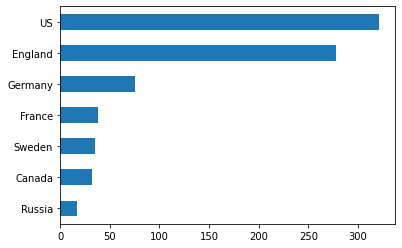

In [52]:
df.origin.value_counts().head(7).sort_values().plot(kind='barh')

## For apples described as "small" in their comment section, how often are they just for eating?

In [53]:
df_small = df.dropna(subset=['comment'])

In [54]:
small = df_small[df_small.comment.str.contains("small")]

In [55]:
small.use.value_counts(normalize=True) * 100

Eating                     64.70588235294117
Cooking                    8.823529411764707
Cider                       5.88235294117647
Eating, Cooking             5.88235294117647
Cooking, Eating             5.88235294117647
Eating, Cooking, Dessert   2.941176470588235
Eating, Cooking, Baking    2.941176470588235
Cooking, Eating.           2.941176470588235
Name: use, dtype: float64

## Save a CSV of just apples from Sweden, calling it `sweden.csv`

In [85]:
# df.origin.value_counts().head(7)

In [71]:
sweden = df[df.origin == 'Sweden']
sweden
sweden.to_csv('sweden.csv', index = False)

## What was the first apple cultivar from Japan?

In [116]:
df[df.origin == 'Japan'].sort_values(by='first_developed', ascending=True).head(3)

,common_name,origin,first_developed,comment,use
1122,Washu 1984,Japan,1920,Conical with light green skin and dark freckle...,Eating
244,Crispin,Japan,1930,See Mutsu,Eating
400,Fuji,Japan,1930,"P Red Delicious × Ralls Genet. Dark red, conic...",Eating


## How old are these apple cultivars?

You could use `.describe()`, but I want a graph. **What kind of chart do you use?** I want to see a graph that shows me a summary when these cultivars were discovered/introduced, not a graph of each individual one's year of introduction.

<AxesSubplot:>

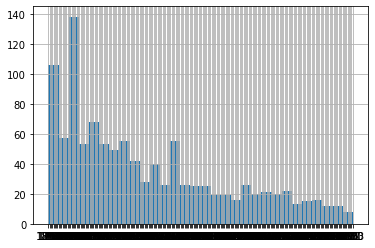

In [141]:
df.first_developed.hist(bins=30)

In [118]:
df.common_name.agg(["count", "mean"]).round(2)

count    1200
Name: common_name, dtype: int64

In [142]:
df.groupby('first_developed')['common_name'].describe()

,count,unique,top,freq
first_developed,,,,
1500,1,1,Nonpareil,1
1580,1,1,London Pippin,1
1588,1,1,Automn Pearmain,1
1597,1,1,Royal Russet,1
1598,1,1,Calville Blanc d'hiver,1
...,...,...,...,...
2008,3,3,Delfloga,1
2009,2,2,Envy,1
2010,2,2,Deltana,1


In [145]:
# df.groupby('first_developed').common_name.value_counts()

## How old are most apple cultivars that are used for creating cider?

Cider used to be a big deal, so I would assume they're older. Include **anything that includes "Cider" anywhere in the `Use` description**. Make a graph, same as the last question.

In [87]:
df_cider = df.dropna(subset=['comment'])

In [88]:
cider = df_cider[df_cider.comment.str.contains("cider")]

In [96]:
# cider

<AxesSubplot:>

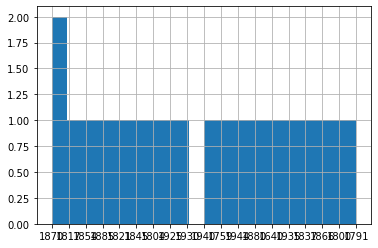

In [165]:
cider.first_developed.hist(bins=20)

In [161]:
cider.first_developed.sort_values(ascending=True)

924     1640
758     1759
1117    1791
1074    1800
468     1804
168     1817
435     1821
989     1837
442     1845
333     1854
1009    1866
864     1870
104     1870
919     1880
413     1885
485     1925
568     1930
946     1935
750     1940
822     1944
926      NaN
Name: first_developed, dtype: object